# Convolutional Neural Network
**Name Student 1:**Ido Zemel<br></br>
**ID Student 1:**205500663<br></br>
**Name Student 2:**Hila Peled<br></br>
**ID Student 2:**205660655

### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import shutil
import random

In [2]:
tf.__version__

'2.8.0'

In [3]:
from google.colab import drive
drive_dir = '/mntDrive'
drive.mount(drive_dir)

Mounted at /mntDrive


### Data Preprocessing

**Loading the data**

First of all we will read our CSV file

In [ ]:
labels = pd.read_csv('/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/labels.csv')

In [ ]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Afterwards we will get access to our old train files.

In [ ]:
old_train = '/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/train'

filenames=os.listdir(old_train)
train_len = len(filenames)
print(f'Number of train data:{train_len}')

Number of train data:10222


In [ ]:
target, dog_breeds = pd.factorize(labels['breed'], sort = True)
#labels['target'] = target

print(dog_breeds)

Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)


In [ ]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

We have extracted all our relevant data for dividing the data.
and now we will split it from 10222 pictures to 6000

Lets prepare our directories

In [ ]:
path = os.path.join('/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle','data_new')
os.mkdir(path)

In [ ]:
train_new = os.path.join(path,'train_new')
test_new = os.path.join(path,'test_new')

os.mkdir(train_new)
os.mkdir(test_new)

In [ ]:
## Create a directory for each dog breed classes in the train directory
for breed in dog_breeds:
    breed_dir = os.path.join(train_new,breed) 
    os.mkdir(breed_dir)

In [ ]:
iterations = 0
for root, dirs, files in os.walk(old_train):
    for file in files:
        imgName = file.split('.')[0]
        src_file = os.path.join(old_train, file)
        labelDestiny = labels.loc[labels['id']==imgName,'breed']
        destination = os.path.join(train_new , labelDestiny.iloc[0])
        #destination = os.path.join(train_dir, labels.loc[imgName, 'breed'])
        shutil.copy2(src_file, destination)
        iterations+=1
print(f'Number of images copied:{iterations}')

Number of images copied:10222


After 10222 iterations, it means we have copied all our training set to our new train set.
now to cut each breed to 50 pictures.

In [ ]:
#In this section we are going to delete our dataset randmly, untill there is 50picture of each breed.
for root, dirs, files in os.walk(train_new):
  for dir in dirs:
    src_dir = os.path.join(train_new, dir)
    fileLen = os.listdir(src_dir)
    while len(fileLen) > 50:
      random_file=random.choice(os.listdir(src_dir))
      delete_rdm = os.path.join(src_dir, random_file)
      os.remove(delete_rdm)
      fileLen = os.listdir(src_dir)

In [ ]:
#Checking if every folder has only 50 images.
fldrNumber = 1
for root, dirs, files in os.walk(train_new):
  for dir in dirs:  
    src_dir = os.path.join(train_new, dir)
    fileLen = os.listdir(src_dir)
    fileLen = len(fileLen)
    print(f'Folder number:{fldrNumber}, Number of images:{fileLen}, Breed:{dir}.')
    fldrNumber += 1

Folder number:1, Number of images:50, Breed:affenpinscher.
Folder number:2, Number of images:50, Breed:afghan_hound.
Folder number:3, Number of images:50, Breed:african_hunting_dog.
Folder number:4, Number of images:50, Breed:airedale.
Folder number:5, Number of images:50, Breed:american_staffordshire_terrier.
Folder number:6, Number of images:50, Breed:appenzeller.
Folder number:7, Number of images:50, Breed:australian_terrier.
Folder number:8, Number of images:50, Breed:basenji.
Folder number:9, Number of images:50, Breed:basset.
Folder number:10, Number of images:50, Breed:beagle.
Folder number:11, Number of images:50, Breed:bedlington_terrier.
Folder number:12, Number of images:50, Breed:bernese_mountain_dog.
Folder number:13, Number of images:50, Breed:black-and-tan_coonhound.
Folder number:14, Number of images:50, Breed:blenheim_spaniel.
Folder number:15, Number of images:50, Breed:bloodhound.
Folder number:16, Number of images:50, Breed:bluetick.
Folder number:17, Number of imag

So now we have 120*50 = 6k images as our data set.
It is time to take 20% of it and make it test set.  

In [ ]:
## Create a directory for each dog breed classes in the test directory
for breed in dog_breeds:
    breed_dir = os.path.join(test_new,breed) 
    os.mkdir(breed_dir)

In [ ]:
#In this section we are going to move our dataset randmly from train to test, untill we moved 20% of the data.
split = int(50*0.8)
print(f'80% of the data means we are going to be left with {split} images as train.')
for root, dirs, files in os.walk(train_new):
  for dir in dirs:
    src_dir = os.path.join(train_new, dir)
    dst_dir = os.path.join(test_new, dir)
    fileLen = os.listdir(src_dir)
    while len(fileLen) > split:
      random_file=random.choice(os.listdir(src_dir))
      src_rdm = os.path.join(src_dir, random_file)
      dst_rdm = os.path.join(dst_dir,random_file)
      shutil.move(src_rdm, dst_rdm)
      fileLen = os.listdir(src_dir)

80% of the data means we are going to be left with 40 images as train.


In [ ]:
#Another check, but this time we are going to see if the images move from train_new to test_new
fldrNumber = 1
for root, dirs, files in os.walk(test_new):
  for dir in dirs:  
    src_dir = os.path.join(test_new, dir)
    fileLen = os.listdir(src_dir)
    fileLen = len(fileLen)
    print(f'Folder number:{fldrNumber}, Number of images:{fileLen}, Breed:{dir}.')
    fldrNumber += 1

Folder number:1, Number of images:10, Breed:affenpinscher.
Folder number:2, Number of images:10, Breed:afghan_hound.
Folder number:3, Number of images:10, Breed:african_hunting_dog.
Folder number:4, Number of images:10, Breed:airedale.
Folder number:5, Number of images:10, Breed:american_staffordshire_terrier.
Folder number:6, Number of images:10, Breed:appenzeller.
Folder number:7, Number of images:10, Breed:australian_terrier.
Folder number:8, Number of images:10, Breed:basenji.
Folder number:9, Number of images:10, Breed:basset.
Folder number:10, Number of images:10, Breed:beagle.
Folder number:11, Number of images:10, Breed:bedlington_terrier.
Folder number:12, Number of images:10, Breed:bernese_mountain_dog.
Folder number:13, Number of images:10, Breed:black-and-tan_coonhound.
Folder number:14, Number of images:10, Breed:blenheim_spaniel.
Folder number:15, Number of images:10, Breed:bloodhound.
Folder number:16, Number of images:10, Breed:bluetick.
Folder number:17, Number of imag

Lets get ourself some paths around the drive.

In [4]:
#Project dir inside the drive
main_drive_dir = drive_dir + '/MyDrive/DeepLearning/adv_end'

#Dataset dir
data_dir = main_drive_dir + '/Kaggle/data_new'

#Train & test dir
train_dir = data_dir + '/train_new'
test_dir = data_dir + '/test_new'

#Models dir
model_dir = main_drive_dir + "/models"

### Data Augmentation

In [5]:
#Imports
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense,Flatten,Activation,Dropout
from keras.layers import BatchNormalization
from keras import callbacks

In [7]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   rotation_range=90,
                                   #brightness_range = [0.4,1.5],
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/train_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/train_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

test_dataset = test_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/test_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 class_mode='categorical')


Found 3840 images belonging to 120 classes.
Found 960 images belonging to 120 classes.
Found 1200 images belonging to 120 classes.


In [ ]:
first_batch = train_dataset.next()
first_batch[0].shape, first_batch[1].shape

((32, 299, 299, 3), (32, 120))

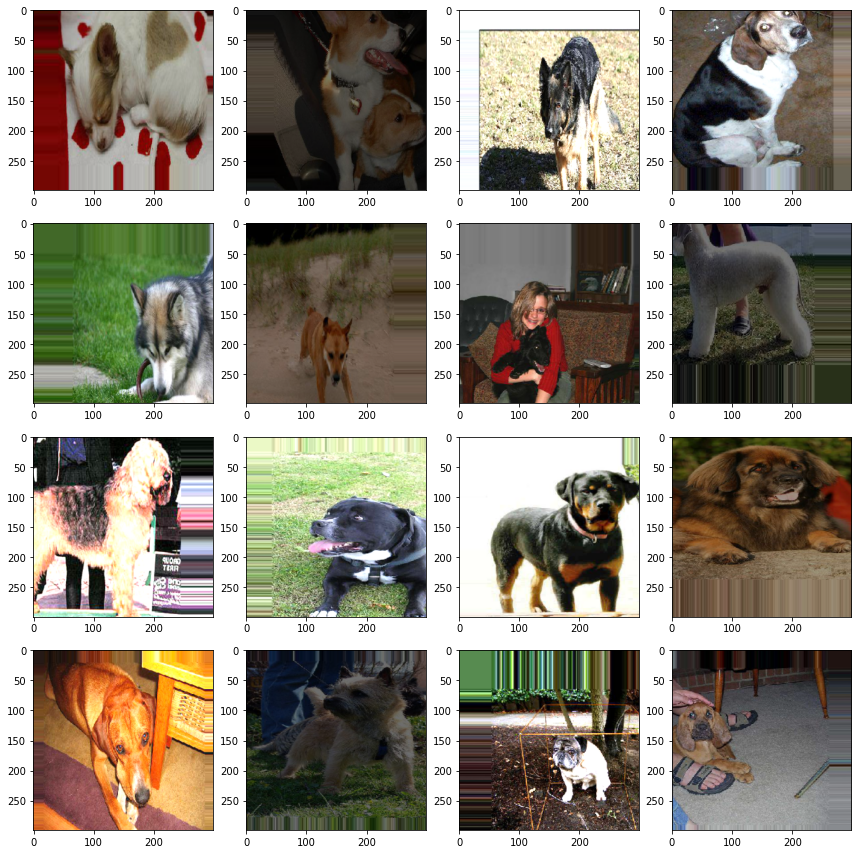

In [ ]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 16
    num_row, num_col = 4, 4
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()


visualize_batch(batch=first_batch)

#Useable function for visualize

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# get random image path and class
def get_random_image():
  random_class_index = np.random.randint(1,120)
  random_image_index = np.random.randint(1, 40)

  random_class_name = os.listdir(train_dir)[random_class_index]
  random_image_name = os.listdir(train_dir + '/' + random_class_name)[random_image_index]

  image_path = train_dir + '/' + random_class_name + '/' + random_image_name
  return (image_path,random_class_name)

In [9]:
def decode_predictions(preds, top=5, class_list_path=None):
    results = []
    top_indices = (-preds).argsort()[0]
    for i in range(top):
        breed = list(test_dataset.class_indices.keys())[top_indices[i]]
        prob = preds[0][top_indices[i]]
        results.append((breed, prob))
    return results

In [10]:
import PIL
from keras.applications.xception import preprocess_input
def visualize_pred(model):
  img_path, img_class = get_random_image()

  sp = plt.subplot(1, 1, 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title('Real: ' + img_class, fontsize=16)
  plt.imshow(img, cmap='gray')    
  plt.show()

  image = PIL.Image.open(img_path)
  image = np.array(image.resize((224,224)))

  test_image = np.expand_dims(image, axis=0)
  b = preprocess_input(image)
  result = model.predict(np.expand_dims(b, axis=0))
  max_index_col = np.argmax(result[0], axis=0)
  print(max_index_col)
  print('Predicted:', decode_predictions(result, top=5))
  list(test_dataset.class_indices.keys())[max_index_col]
  print('actual class prediction:', result[0, test_dataset.class_indices[img_class]])


# Experiment number 1:

##Building NN

This is our model. </br>
In this first experiment we are going to teach our machine with this "basic" architecture. </br>

In [11]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=[224, 224, 3]))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dense(120, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      432       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     48        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 56, 56, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        4

Our first model has only 2.3m paramenters.</br>
Let us start learning and see how good we are getting.

In [12]:
# This callback will stop the training when there is no improvement in
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

es = [
      EarlyStopping(
          monitor='val_accuracy',
          mode='max', patience=7,
          restore_best_weights=True),
      ModelCheckpoint(model_dir + '/first_model.h5',
                      verbose=1,
                      monitor='val_accuracy',
                      save_best_only=True), 
]

# Training the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = train_dataset, validation_data = validation_dataset ,epochs=60, callbacks=[es])

Epoch 1/60
120/120 [==============================] - ETA: 0s - loss: 4.9764 - accuracy: 0.0070 
Epoch 1: val_accuracy improved from -inf to 0.00833, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/first_model.h5
120/120 [==============================] - 2461s 20s/step - loss: 4.9764 - accuracy: 0.0070 - val_loss: 4.8047 - val_accuracy: 0.0083
Epoch 2/60
120/120 [==============================] - ETA: 0s - loss: 4.8131 - accuracy: 0.0091
Epoch 2: val_accuracy did not improve from 0.00833
120/120 [==============================] - 82s 687ms/step - loss: 4.8131 - accuracy: 0.0091 - val_loss: 4.8429 - val_accuracy: 0.0083
Epoch 3/60
120/120 [==============================] - ETA: 0s - loss: 4.7948 - accuracy: 0.0096
Epoch 3: val_accuracy did not improve from 0.00833
120/120 [==============================] - 83s 695ms/step - loss: 4.7948 - accuracy: 0.0096 - val_loss: 4.9923 - val_accuracy: 0.0083
Epoch 4/60
120/120 [==============================] - ETA: 0s - loss: 4.7807 

##Visualize

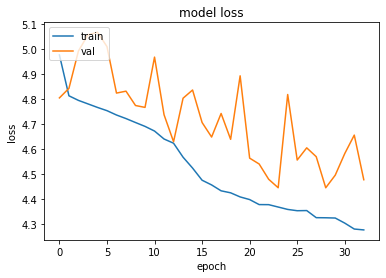

In [13]:
#Visualization of the Loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

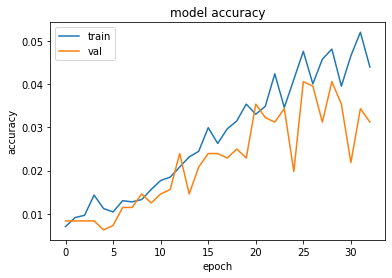

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Predictions and Evaluations

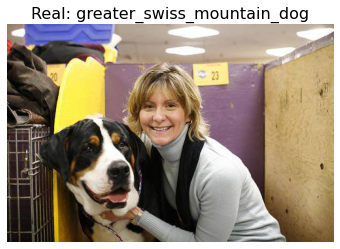

5
Predicted: [('appenzeller', 0.16974758), ('greater_swiss_mountain_dog', 0.08792777), ('tibetan_mastiff', 0.08399503), ('boston_bull', 0.07127242), ('schipperke', 0.066594206)]
actual class prediction: 0.08792777


In [15]:
visualize_pred(model)

In [16]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)
print('Accuracy of our first model on the test images: {:.2f}%'.format(test_acc * 100))

38/38 [==============================] - 581s 16s/step - loss: 4.5076 - accuracy: 0.0292
Accuracy of our first model on the test images: 2.92%


To be honest I had higher hopes for higher accuracy precentage. </br>
But this is only our first experiment and its time to try new stuff and get even better. </br>

# Experiment number 2:

##Building NN

In our second experiment we are going to try learn our machine with less one layer, less neurons to learn and less weight to calculate. <br/>
Lets see what is the results.

In [ ]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.6))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(120, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 32)       

In [ ]:
# This callback will stop the training when there is no improvement in
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

es = [
      EarlyStopping(
          monitor='val_accuracy',
          mode='max', patience=7,
          restore_best_weights=True),
      ModelCheckpoint(model_dir + '/second_model.h5',
                      verbose=1,
                      monitor='val_accuracy',
                      save_best_only=True), 
]

# Training the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = train_dataset, validation_data = validation_dataset ,epochs=60, callbacks=[es])

Epoch 1/60
120/120 [==============================] - ETA: 0s - loss: 6.2331 - accuracy: 0.0055
Epoch 1: val_accuracy improved from -inf to 0.00833, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/second_model.h5
120/120 [==============================] - 101s 828ms/step - loss: 6.2331 - accuracy: 0.0055 - val_loss: 5.1106 - val_accuracy: 0.0083
Epoch 2/60
120/120 [==============================] - ETA: 0s - loss: 4.9212 - accuracy: 0.0065
Epoch 2: val_accuracy did not improve from 0.00833
120/120 [==============================] - 97s 812ms/step - loss: 4.9212 - accuracy: 0.0065 - val_loss: 4.8270 - val_accuracy: 0.0083
Epoch 3/60
120/120 [==============================] - ETA: 0s - loss: 4.8063 - accuracy: 0.0042
Epoch 3: val_accuracy did not improve from 0.00833
120/120 [==============================] - 98s 817ms/step - loss: 4.8063 - accuracy: 0.0042 - val_loss: 4.7939 - val_accuracy: 0.0083
Epoch 4/60
120/120 [==============================] - ETA: 0s - loss: 4.7915

##Visualize

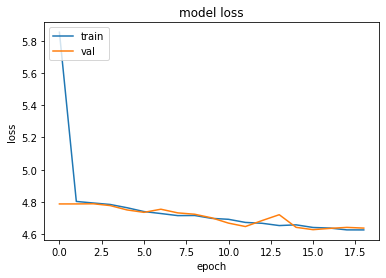

In [ ]:
#Visualization of the Loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

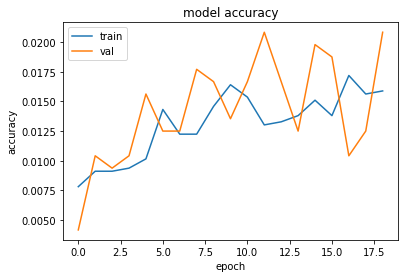

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Predictions and Evaluations

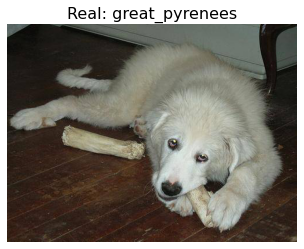

98
Predicted: [('sealyham_terrier', 0.016950669), ('clumber', 0.016565766), ('samoyed', 0.01593754), ('bedlington_terrier', 0.015902624), ('kuvasz', 0.015454614)]
actual class prediction: 0.015395225


In [ ]:
visualize_pred(model)

In [ ]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)
print('Accuracy of our second model on the test images: {:.2f}%'.format(test_acc * 100))

38/38 [==============================] - 8s 217ms/step - loss: 4.6196 - accuracy: 0.0183
Accuracy of our second model on the test images: 1.83%


After training our model we can see that the one hidden layer that we took of was really neccesery </br>
We can see here that when we are having lack of data, our neural network needs to be alittle bit complex and have more than 3 hidden layers.

# Experiment number 3:

##Building NN

In this experiment we are going to change our kernal sizes.</br>
Instead of going only by (4,4), We are going to change it.

In [ ]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding='same', use_bias=False, input_shape=[224, 224, 3]))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(64, (7, 7), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dense(120, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      1200      
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 16)     48        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 56, 56, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 32)       

In [ ]:
# This callback will stop the training when there is no improvement in
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

es = [
      EarlyStopping(
          monitor='val_accuracy',
          mode='max', patience=5,
          restore_best_weights=True),
      ModelCheckpoint(model_dir + '/third_model.h5',
                      verbose=1,
                      monitor='val_accuracy',
                      save_best_only=True), 
]

# Training the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = train_dataset, validation_data = validation_dataset ,epochs=60, callbacks=[es])

Epoch 1/60
120/120 [==============================] - ETA: 0s - loss: 4.9578 - accuracy: 0.0083
Epoch 1: val_accuracy improved from -inf to 0.01042, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/third_model.h5
120/120 [==============================] - 259s 2s/step - loss: 4.9578 - accuracy: 0.0083 - val_loss: 4.7921 - val_accuracy: 0.0104
Epoch 2/60
120/120 [==============================] - ETA: 0s - loss: 4.8011 - accuracy: 0.0096
Epoch 2: val_accuracy did not improve from 0.01042
120/120 [==============================] - 256s 2s/step - loss: 4.8011 - accuracy: 0.0096 - val_loss: 4.8195 - val_accuracy: 0.0083
Epoch 3/60
120/120 [==============================] - ETA: 0s - loss: 4.7782 - accuracy: 0.0135
Epoch 3: val_accuracy did not improve from 0.01042
120/120 [==============================] - 256s 2s/step - loss: 4.7782 - accuracy: 0.0135 - val_loss: 4.8358 - val_accuracy: 0.0052
Epoch 4/60
120/120 [==============================] - ETA: 0s - loss: 4.7453 - accur

##Visualize

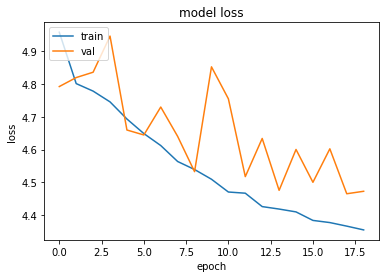

In [ ]:
#Visualization of the Loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

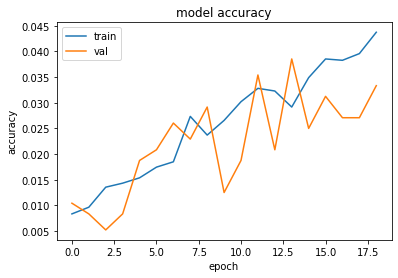

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Predictions and Evaluations

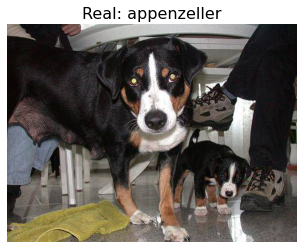

5
Predicted: [('appenzeller', 0.28749573), ('boston_bull', 0.103489555), ('entlebucher', 0.0981467), ('bernese_mountain_dog', 0.07303949), ('greater_swiss_mountain_dog', 0.04197169)]
actual class prediction: 0.28749573


In [ ]:
visualize_pred(model)

With only 3.42% accuracy on our test dataset, our model predicted the breed! </br>

In [ ]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)
print('Accuracy of our third model on the test images: {:.2f}%'.format(test_acc * 100))

38/38 [==============================] - 19s 489ms/step - loss: 4.4006 - accuracy: 0.0342
Accuracy of our third model on the test images: 3.42%


In our third experment we havnt accomplished our best accuracy prediction, and our machine even predicted the breed! </br>
In conclusion for our third experiment we have noticed that changing our kernal sizes does matter and helps the machine learn better with the lack of data.

# Experiment number 4 (The Chosen architecture):

In the last experiment we are going to duplicate with data 2times.</br>
From 4.8k images we are going to have 14.4k, each image has been rotated before duplicating. </br>
</br>
And afterwards we are going to have more augmentation to each image to "trick" our learning machine to study even better.

##Data Preprocessing

In [17]:
#Data augmentation on every photo for 2times.
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image

datagen = ImageDataGenerator(horizontal_flip=True,
                             rotation_range=90)

j = 0
for root, dirs, files in os.walk(train_dir):
  for dir in dirs:
    src_dir = os.path.join(train_dir, dir)
    src_dir2 = os.path.join(train_dir, dir)
    filenames = os.listdir(src_dir)
    #fileLen = len(fileLen)
    #print(fileLen)
    for f in filenames:
      src_img = os.path.join(src_dir , f)
      imgName = f.split('.')[0]
      img_name = Image.open(src_img)
      x = img_to_array(img_name)
      # Reshape the input image 
      x = x.reshape((1, ) + x.shape)  
      i = 0
      # generate 5 new augmented images 
      for batch in datagen.flow(x, batch_size = 1, 
                        save_to_dir =src_dir,  
                        save_prefix =imgName, save_format ='jpeg'):
          i += 1
          j += 1
          if i == 2:
            break


print(f'Number of new images saved:{j}')

Number of new images saved:9600


We will use the same augemntation we used to our previoues model

In [6]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   rotation_range=90,
                                   #brightness_range = [0.4,1.5],
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/train_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/train_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

test_dataset = test_datagen.flow_from_directory(batch_size=32,
                                                 directory='/mntDrive/MyDrive/DeepLearning/adv_end/Kaggle/data_new/test_new',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 class_mode='categorical')


Found 11520 images belonging to 120 classes.
Found 2878 images belonging to 120 classes.
Found 1200 images belonging to 120 classes.


##Building NN

From this experiment, we have going to use our the model who have achieved the maximum accuracy on the test data</br>


In [7]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding='same', use_bias=False, input_shape=[224, 224, 3]))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(64, (7, 7), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dense(120, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1200      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     48        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 56, 56, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        4

In [ ]:
# This callback will stop the training when there is no improvement in
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

es = [
      EarlyStopping(
          monitor='val_accuracy',
          mode='max', patience=7,
          restore_best_weights=True),
      ModelCheckpoint(model_dir + '/fourth_model.h5',
                      verbose=1,
                      monitor='val_accuracy',
                      save_best_only=True), 
]

# Training the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = train_dataset, validation_data = validation_dataset ,epochs=60, callbacks=[es])

Epoch 1/60
360/360 [==============================] - ETA: 0s - loss: 4.8492 - accuracy: 0.0087
Epoch 1: val_accuracy improved from -inf to 0.00834, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 257s 710ms/step - loss: 4.8492 - accuracy: 0.0087 - val_loss: 4.9187 - val_accuracy: 0.0083
Epoch 2/60
360/360 [==============================] - ETA: 0s - loss: 4.7513 - accuracy: 0.0134
Epoch 2: val_accuracy improved from 0.00834 to 0.01147, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 251s 698ms/step - loss: 4.7513 - accuracy: 0.0134 - val_loss: 4.8100 - val_accuracy: 0.0115
Epoch 3/60
360/360 [==============================] - ETA: 0s - loss: 4.6027 - accuracy: 0.0227
Epoch 3: val_accuracy improved from 0.01147 to 0.02432, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 

Our google colab have crashed therefor the history is gone </br>
But we have saved our models weight and it is time to restore it and keep teaching our machine.

In [12]:
# This callback will stop the training when there is no improvement in
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

es = [
      EarlyStopping(
          monitor='val_accuracy',
          mode='max', patience=7,
          restore_best_weights=True),
      ModelCheckpoint(model_dir + '/fourth_model.h5',
                      verbose=1,
                      monitor='val_accuracy',
                      save_best_only=True), 
]


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.load_weights(model_dir + '/fourth_model.h5')
history = model.fit(x = train_dataset, validation_data = validation_dataset ,epochs=60, callbacks=[es])

Epoch 1/60
360/360 [==============================] - ETA: 0s - loss: 3.9187 - accuracy: 0.0913
Epoch 1: val_accuracy improved from -inf to 0.04065, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 4422s 12s/step - loss: 3.9187 - accuracy: 0.0913 - val_loss: 4.9290 - val_accuracy: 0.0407
Epoch 2/60
360/360 [==============================] - ETA: 0s - loss: 3.8873 - accuracy: 0.0912
Epoch 2: val_accuracy improved from 0.04065 to 0.04934, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 744s 2s/step - loss: 3.8873 - accuracy: 0.0912 - val_loss: 4.4938 - val_accuracy: 0.0493
Epoch 3/60
360/360 [==============================] - ETA: 0s - loss: 3.8777 - accuracy: 0.0938
Epoch 3: val_accuracy improved from 0.04934 to 0.06602, saving model to /mntDrive/MyDrive/DeepLearning/adv_end/models/fourth_model.h5
360/360 [==============================] - 744s

Last 10 epoches visualize

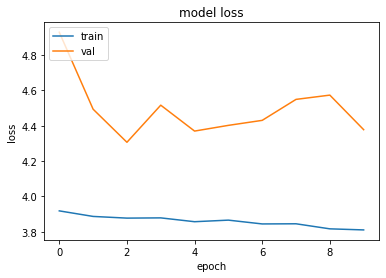

In [16]:
#Visualization of the Loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

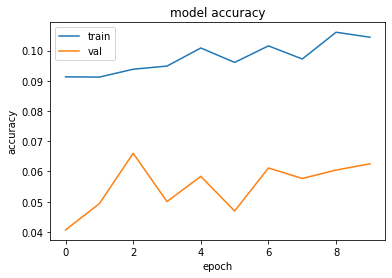

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
visualize_pred(model)

##Evaluate test data

This first evaluate is when google colab crashed at first after epoch 39 </br>
By mistake I havn't change the "third model" to "fourth". </br>

In [11]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)
print('Accuracy of our third model on the test images: {:.2f}%'.format(test_acc * 100))

38/38 [==============================] - 258s 7s/step - loss: 4.3135 - accuracy: 0.0658
Accuracy of our third model on the test images: 6.58%


The 2nd evaluate is after restoring our weights and kept teaching the machine. </br>
As we can see it got worst. </br>
From 6.5 to 5.5

In [15]:
# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_dataset)
print('Accuracy of our fouth model on the test images: {:.2f}%'.format(test_acc * 100))

38/38 [==============================] - 17s 446ms/step - loss: 4.3785 - accuracy: 0.0558
Accuracy of our fouth model on the test images: 5.58%
